# Testando e comparando os modelos de Detecção de Emoções

## Etapa 1 - Importando as bibliotecas

In [ ]:
#Importação bibliotecas 
import cv2
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow
import zipfile
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

TensorFlow 2.x selected.


'2.0.0'

## Etapa 2 - Conectando com o Drive e acessando os arquivos

In [ ]:
#Conexão com o drive e acessando os caminhos
from google.colab import drive
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive/Material.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")
zip_object.close

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


<bound method ZipFile.close of <zipfile.ZipFile filename='/content/gdrive/My Drive/Material.zip' mode='r'>>

# Faz uma comparação

In [ ]:
#Avalia o desempenho e calcula o loss e acuracia dos 5 modelos
from tensorflow.keras.models import load_model
import operator

# Nome dos modelos que serão comparados
arquivos_modelos = ["modelo_01_expressoes.h5", "modelo_02_expressoes.h5", "modelo_03_expressoes.h5", "modelo_04_expressoes.h5", "modelo_05_expressoes.h5"]

modelos = {}

x_test = np.load('Material/mod_xtest.npy')
y_test = np.load('Material/mod_ytest.npy')

for modelo in arquivos_modelos:
  model = load_model('Material/' + modelo)

  # Calcula a acurácia do modelo obtida ao testar na base de teste
  scores = model.evaluate(np.array(x_test), np.array(y_test), batch_size=64)
  print("---"+ str(modelo) +"---")
  print("Perda/Loss: " + str(scores[0]))
  print("Acurácia: " + str(scores[1]))
  modelos[modelo] = str(scores[1])
  print("\n")

3589/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [ ]:
#Ordena os modelos por melhor acuracia
# Ordena em ordem decrescente os modelos com base no valor da acurácia
order_modelos = sorted(modelos.items(), key=operator.itemgetter(1), reverse=True)
print(order_modelos)

[('modelo_02_expressoes.h5', '0.6411257'), ('modelo_01_expressoes.h5', '0.63917524'), ('modelo_03_expressoes.h5', '0.6308164'), ('modelo_04_expressoes.h5', '0.61604905'), ('modelo_05_expressoes.h5', '0.24547228')]


In [ ]:
#Melhor modelo
rder_modelos[0]

('modelo_02_expressoes.h5', '0.6411257')

## Teste com o modelo carregado

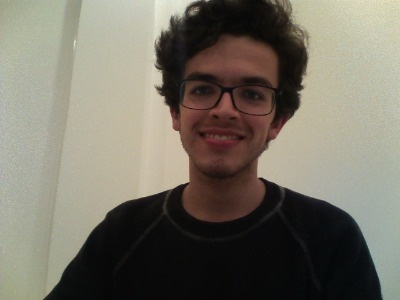

In [ ]:
#Carrega imagem
imagem = cv2.imread("Material/testes/teste_gabriel.png")
cv2_imshow(imagem)

In [ ]:
#Carrega o detector de faces, o modelo, o classificador de emoção e as expressoes
cascade_faces = 'Material/haarcascade_frontalface_default.xml'
caminho_modelo = 'Material/' + str(order_modelos[0][0])
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile=False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

[1.2285657e-03 8.9724359e-05 7.5628090e-04 9.4787621e-01 2.9239706e-03
 5.5896165e-04 4.6566207e-02]


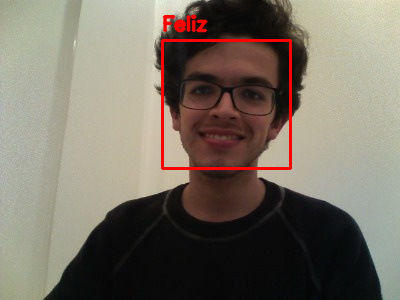

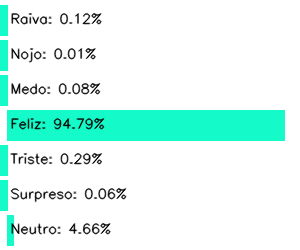

In [ ]:
#utiliza do melhor modelo para plotar a imagem dizendo a emoção e o gráfico de barras para dizer qual era a chance de cada emoção
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array

# Carrega o modelo
face_detection = cv2.CascadeClassifier(cascade_faces)
classificador_emocoes = load_model(caminho_modelo, compile=False)

expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]

original = imagem.copy()
faces = face_detection.detectMultiScale(original,scaleFactor=1.1,minNeighbors=3,minSize=(20,20))
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

if len(faces) > 0:
    for (fX, fY, fW, fH) in faces:
      roi = cinza[fY:fY + fH, fX:fX + fW]
      roi = cv2.resize(roi, (48, 48))
      roi = roi.astype("float") / 255.0
      roi = img_to_array(roi)
      roi = np.expand_dims(roi, axis=0)
      preds = classificador_emocoes.predict(roi)[0]
      print(preds)
      emotion_probability = np.max(preds)
      label = expressoes[preds.argmax()]
      cv2.putText(original, label, (fX, fY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.65, (0, 0, 255), 2, cv2.LINE_AA)
      cv2.rectangle(original, (fX, fY), (fX + fW, fY + fH),(0, 0, 255), 2)
else:
    print('Nenhuma face detectada')


cv2_imshow(original)

probabilidades = np.ones((250, 300, 3), dtype="uint8") * 255
# Mostra gráfico apenas se detectou uma face
if len(faces) == 1:
  for (i, (emotion, prob)) in enumerate(zip(expressoes, preds)):
      # Nome das emoções
      text = "{}: {:.2f}%".format(emotion, prob * 100)
      w = int(prob * 300)
      cv2.rectangle(probabilidades, (7, (i * 35) + 5),
      (w, (i * 35) + 35), (200, 250, 20), -1)
      cv2.putText(probabilidades, text, (10, (i * 35) + 23),
      cv2.FONT_HERSHEY_SIMPLEX, 0.45,
      (0, 0, 0), 1, cv2.LINE_AA)

  cv2_imshow(probabilidades)

cv2.imwrite("captura.jpg",original)
cv2.destroyAllWindows()